# Loading

In [1]:
import tobii_research as tr
from utils import *

def get_tracker():
  all_eyetrackers = tr.find_all_eyetrackers()

  for tracker in all_eyetrackers:
    print("Model: " + tracker.model)
    print("Serial number: " + tracker.serial_number) 
    print(f"Can stream eye images: {tr.CAPABILITY_HAS_EYE_IMAGES in tracker.device_capabilities}")
    print(f"Can stream gaze data: {tr.CAPABILITY_HAS_GAZE_DATA in tracker.device_capabilities}")
    return tracker

tracker = get_tracker()

Model: Tobii Pro Fusion
Serial number: TPFC6-010203104285
Can stream eye images: True
Can stream gaze data: True


In [6]:
data, dict = build_dataset(tracker, 'cat')
data.head()

,device_time_stamp,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_trackbox_coordinate_system,left_gaze_origin_validity,right_gaze_point_on_display_area,right_gaze_point_in_user_coordinate_system,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_trackbox_coordinate_system,right_gaze_origin_validity,type
timestep_1,977956615,520576768939,"(0.7876507639884949, 0.0030505128670483828)","(54.27063751220703, 118.5871810913086, 32.5203...",1,3.907166,1,"(-14.419445037841797, -2.431776523590088, 639....","(0.5307302474975586, 0.5074051022529602, 0.427...",1,"(0.45131051540374756, 0.03603844344615936)","(-9.186172485351562, 114.9319076538086, 31.189...",1,3.665451,1,"(46.14021682739258, -4.191587448120117, 631.58...","(0.40134385228157043, 0.51054847240448, 0.4135...",1,cat
timestep_2,978456633,520577268895,"(0.7941198348999023, 0.029128964990377426)","(55.49116134643555, 115.6975326538086, 31.4686...",1,4.096313,1,"(-14.524250030517578, -2.1957154273986816, 639...","(0.530953586101532, 0.5069085359573364, 0.4270...",1,"(0.4568060636520386, 0.08935932070016861)","(-8.149343490600586, 109.02360534667969, 29.03...",1,3.933029,1,"(46.0914306640625, -4.076186180114746, 631.449...","(0.401424765586853, 0.510299801826477, 0.41320...",1,cat
timestep_3,978973322,520577785508,"(0.8531140089035034, 0.7908445000648499)","(66.62149810791016, 31.294469833374023, 0.7484...",1,4.364532,1,"(-14.157514572143555, -3.532245397567749, 638....","(0.5302284955978394, 0.5096953511238098, 0.424...",1,"(0.4823753833770752, 0.8752466440200806)","(-3.325211524963379, 21.94215965270996, -2.655...",1,4.256119,1,"(46.33567810058594, -5.547893524169922, 630.24...","(0.4006754755973816, 0.5134138464927673, 0.410...",1,cat
timestep_4,979490013,520578302507,"(0.8423702716827393, 0.805956244468689)","(64.59449768066406, 29.619991302490234, 0.1390...",1,4.43425,1,"(-14.439048767089844, -3.344898223876953, 638....","(0.5308101773262024, 0.5093088150024414, 0.425...",1,"(0.4882880449295044, 0.8778282999992371)","(-2.2096776962280273, 21.656097412109375, -2.7...",1,4.259079,1,"(46.03028869628906, -5.433300495147705, 630.54...","(0.40138620138168335, 0.5131766200065613, 0.41...",1,cat
timestep_5,979490013,520578302507,"(0.8423702716827393, 0.805956244468689)","(64.59449768066406, 29.619991302490234, 0.1390...",1,4.43425,1,"(-14.439048767089844, -3.344898223876953, 638....","(0.5308101773262024, 0.5093088150024414, 0.425...",1,"(0.4882880449295044, 0.8778282999992371)","(-2.2096776962280273, 21.656097412109375, -2.7...",1,4.259079,1,"(46.03028869628906, -5.433300495147705, 630.54...","(0.40138620138168335, 0.5131766200065613, 0.41...",1,cat


In [7]:
data.to_csv("cat_looking_updown.csv")

# Visualizations

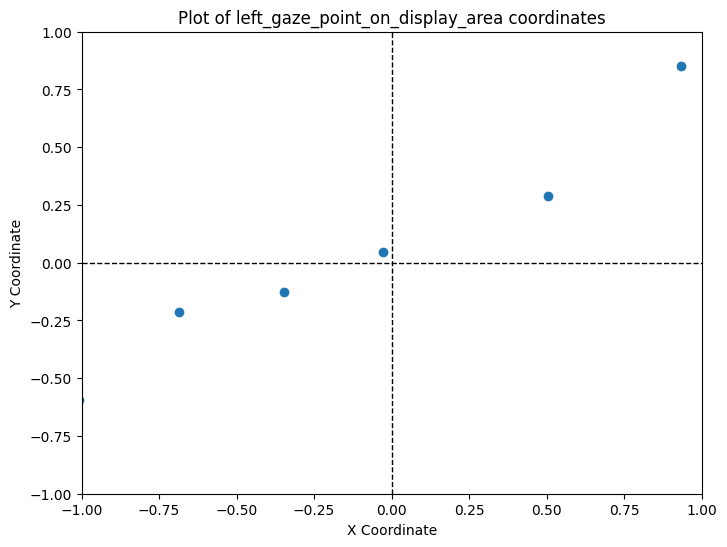

In [37]:
from matplotlib import pyplot as plt

# plot coordinates (you can use this for testing or for funsies)
# takes in a dataframe (call build_dataset first)
#          and a column_name (string)

def translate2ScreenX(xcoord):
    return 2*xcoord - 1

def translate2ScreenY(ycoord):
    return -2*ycoord + 1

def plot_coordinates(dataframe, column_name):
    # extract x and y coordinates from the specified column
    x_values = [point[0] for point in dataframe[column_name]]
    y_values = [point[1] for point in dataframe[column_name]]
    x_values = list(map(translate2ScreenX, x_values))
    y_values = list(map(translate2ScreenY, y_values))

    
    # plot the coordinates
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, marker='o', label=column_name)
    plt.title(f'Plot of {column_name} coordinates')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    plt.show()
    
plot_coordinates(data, 'left_gaze_point_on_display_area')


# Make eye detection functions

In [28]:
# example
# function should accept a dictionary of gaze data (look at what the gaze_data function returns)
# when we call build_dataset, we also make a call to gaze_data, so we'll be able to 
# modify build_dataset to check for movement detection at every timestep.

# things to consider:
# this sample code only takes in one row/timestep
# if we want to use acceleration or speed of eye movements,
# we need to look at multiple rows at a time



def detect_movement_example(data_dict):
    # data_dict should only have 1 row
    assert(len(data_dict) == 1)  # remove this in practice, just keeping it here for initial testing
    
    # get the first (and only) row in data_dict
    eye_data = data_dict.iloc[0]
    
    # get eye coordinates
    left_x, left_y = data.left_gaze_point_on_display_area[0]
    right_x, right_y = data.right_gaze_point_on_display_area[0]
    
    # do some kind of detection
    print(left_x)
    direction = math.atan(left_y/left_x)
    magnitude = math.sqrt(left_x**2 + left_y**2)
    return direction, magnitude
    
# test your function
data2 = pd.DataFrame(data.iloc[0]).transpose()  # call build_dataset and get a row
detect_movement_example(data2)                  # call detect_movement


0.14785295724868774


True

In [ ]:
# functions
# left
# right
# up 
# down
# eye roll

In [1]:
# try incorporating your function into a modified build_dataset, 
# so you can test your movement detection function while recording data

# make modifications here:

import pandas as pd
def modified_build_dataset(tracker, label, add_on = False, df_orig = pd.DataFrame(), 
                  time_step_sec = 0.5, tot_time_min = 0.1):
    
    global global_gaze_data
    
    intervals = math.ceil((tot_time_min * 60) / time_step_sec)
    dict_list = []
    
    for _ in range(intervals):
        data = gaze_data(tracker, time_step_sec)
        dict_list.append(data)
    
    tot_dict = combine_dicts_with_labels(dict_list)
    df = pd.DataFrame(tot_dict).T
    df['type'] = label
        
    if add_on:
        df_new = pd.concat([df_orig, df])
        df_new = df_new.reset_index(drop=True)
        return df_new
    
    else:
        return df, dict_list

NameError: name 'pd' is not defined